# Information Loss Text

When we employ a pretrained CLIP model, we are constraint to use a
max_length of tokens of 77 (not necessarily representing 77 words). However,
 how many sentences in Artemis and SemArt are longer than that? And on those
 that are longer and hence and not encoded 100%, how much information are we
  missing?

In [5]:
import pandas

from pathlib import Path
from nltk.tokenize import word_tokenize
from data_preprocess.tokenizers import BPETokenizer

In [6]:
artemis_csv = Path("../../DATA/artemis/artemis_dataset_release_v0.csv")
artemis = pandas.read_csv(artemis_csv)
artemis

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8


Mean word count = 17.14858671077056


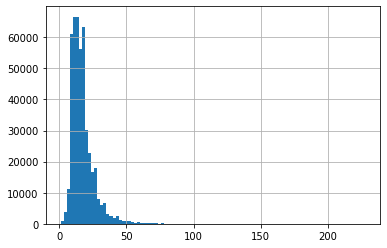

In [7]:
artemis['nb_words'] = artemis['utterance'].apply(
    lambda s: len(word_tokenize(s))
)
artemis['nb_words'].hist(bins=100)
print(f"Mean word count = {artemis['nb_words'].mean()}")

Token indices sequence length is longer than the specified maximum sequence length for this model (78 > 77). Running this sequence through the model will result in indexing errors


Mean token count = 19.72771419271406


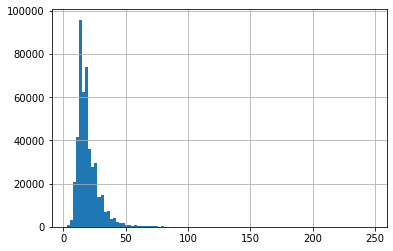

In [8]:
tokenizer = BPETokenizer('clip')
artemis['nb_tokens'] = artemis['utterance'].apply(
    lambda s: len(tokenizer(s)['input_ids'])
)
print(f"Mean token count = {artemis['nb_tokens'].mean()}")
artemis['nb_tokens'].hist(bins=100)

Sentences with tokens left out = 949/454684 = 0.00
Mean token excess = 20.575342465753426


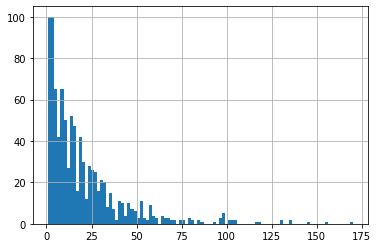

In [9]:
max_len = tokenizer.tokenizer.model_max_length
longest = artemis[artemis['nb_tokens'] > max_len]['nb_tokens'] - max_len
ratio = len(longest)/len(artemis)
longest.hist(bins=100)
print(f"Sentences with tokens left out = {len(longest)}/{(len(artemis))} = "
      f"{ratio:.2f}")
print(f"Mean token excess = {longest.mean()}")

## Semart

In [10]:
semart_csv = Path("../semart.csv")
semart = pandas.read_csv(semart_csv)
semart.dropna(subset=["DESCRIPTION"], inplace=True)
semart

,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME,localpath
0,42725-view2.jpg,"The two Mediterranean views, ""Le Soir: A Medit...","VERNET, Claude-Joseph","""Clair de Lune""","Oil on canvas, 72 x 99 cm",1752,landscape,French,1751-1800,/mnt/HDD/DATA/SEMART/Images/42725-view2.jpg
1,42725-view2.jpg,Vernet made of the moonlit landscape a whole n...,"VERNET, Claude-Joseph","""Clair de Lune""","Oil on canvas, 72 x 99 cm",1752,landscape,French,1751-1800,/mnt/HDD/DATA/SEMART/Images/42725-view2.jpg
2,05032-femminie.jpg,"This painting is a rare, 18th-century depictio...","BONITO, Giuseppe","""Il Femminiello""","Oil on canvas, 77 x 63 cm",-,genre,Italian,1701-1750,/mnt/HDD/DATA/SEMART/Images/05032-femminie.jpg
3,05032-femminie.jpg,These men were usually the youngest child of ...,"BONITO, Giuseppe","""Il Femminiello""","Oil on canvas, 77 x 63 cm",-,genre,Italian,1701-1750,/mnt/HDD/DATA/SEMART/Images/05032-femminie.jpg
4,05032-femminie.jpg,They were met with good humour rather than de...,"BONITO, Giuseppe","""Il Femminiello""","Oil on canvas, 77 x 63 cm",-,genre,Italian,1701-1750,/mnt/HDD/DATA/SEMART/Images/05032-femminie.jpg
...,...,...,...,...,...,...,...,...,...,...
98570,23837-2manet16.jpg,He is also notable for his involvement in the...,"MANET, Edouard",Émile Zola,"Oil on canvas, 146 x 114 cm",1868,portrait,French,1851-1900,/mnt/HDD/DATA/SEMART/Images/23837-2manet16.jpg
98571,23837-2manet16.jpg,Manet demonstratively placed a small study for...,"MANET, Edouard",Émile Zola,"Oil on canvas, 146 x 114 cm",1868,portrait,French,1851-1900,/mnt/HDD/DATA/SEMART/Images/23837-2manet16.jpg
98572,23837-2manet16.jpg,The pamphlet can be seen to the right on the ...,"MANET, Edouard",Émile Zola,"Oil on canvas, 146 x 114 cm",1868,portrait,French,1851-1900,/mnt/HDD/DATA/SEMART/Images/23837-2manet16.jpg
98573,23837-2manet16.jpg,Zola himself makes a well-groomed rather than...,"MANET, Edouard",Émile Zola,"Oil on canvas, 146 x 114 cm",1868,portrait,French,1851-1900,/mnt/HDD/DATA/SEMART/Images/23837-2manet16.jpg


Mean word count = 23.592686368919143


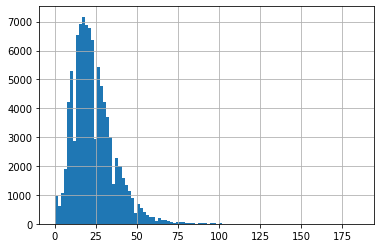

In [11]:
semart['nb_words'] = semart['DESCRIPTION'].apply(
    lambda s: len(word_tokenize(s))
)
semart['nb_words'].hist(bins=100)
print(f"Mean word count = {semart['nb_words'].mean()}")

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors


Mean token count = 29.380945957164204


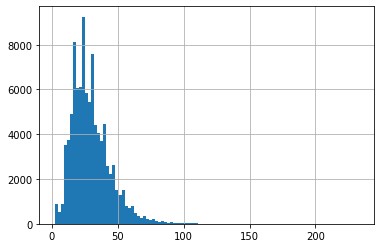

In [12]:
tokenizer = BPETokenizer('clip')
semart['nb_tokens'] = semart['DESCRIPTION'].apply(
    lambda s: len(tokenizer(s)['input_ids'])
)
semart['nb_tokens'].hist(bins=100)
print(f"Mean token count = {semart['nb_tokens'].mean()}")

Sentences with tokens left out = 851/96368 = 0.01
Mean token excess = 14.135135135135135


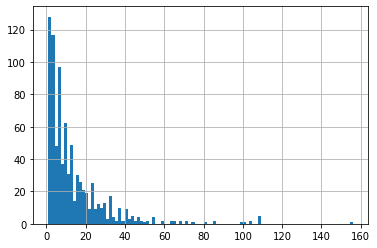

In [13]:
max_len = tokenizer.tokenizer.model_max_length
longest = semart[semart['nb_tokens'] > max_len]['nb_tokens'] - max_len
ratio = len(longest)/len(semart)
longest.hist(bins=100)
print(f"Sentences with tokens left out = {len(longest)}/{(len(semart))} = "
      f"{ratio:.2f}")
print(f"Mean token excess = {longest.mean()}")